<h3 style="text-align: center">Importing the libraries</h3>

In [41]:
# Importing the libraries required for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.figure(figsize=(8, 5))

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset by using the library called 'pandas' with the given url link
df=pd.read_csv("http://bit.ly/w-data")

# Printing the first 5 rows from the dataset by using the following method
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# This attribute tells that how many rows and columns are there in the dataset
df.shape

(25, 2)

In [5]:
# It gives us each detailed information from the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# It gives us the statistical information from the each column of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Checking whether any 'null' values are available in each column in the dataset
df.isna().sum()

Hours     0
Scores    0
dtype: int64

<h3 style='text-align: center'>Plotting the data point on 2-D graph</h3>

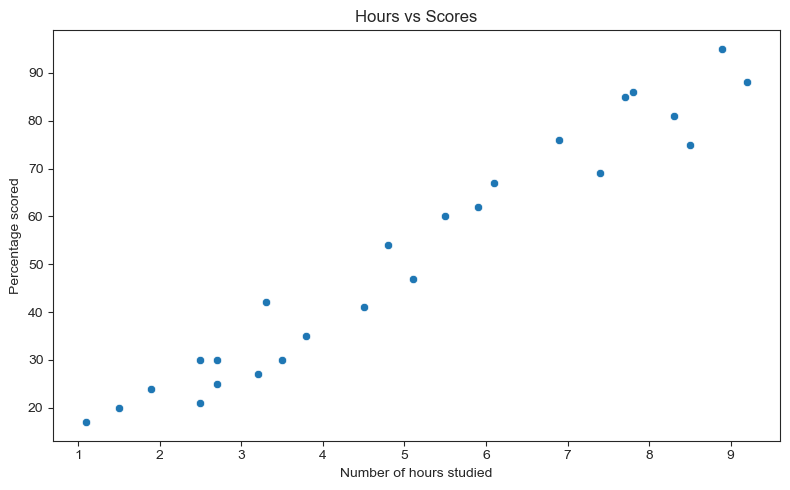

In [42]:
# Plotting the two column values by using the scatterplot from the 'matplotlib and seaborn' libraries
sns.scatterplot(df['Hours'], df['Scores'])
sns.set_style('ticks')
plt.title('Hours vs Scores')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage scored')
plt.tight_layout()
plt.show()

<h3 style='text-align: center'>Preparing the data</h3>

In [9]:
# Splitting the dataset in 'features' and 'labels'
# Features --> The data that is used for training purpose (X)
# Labels --> The data that is used for testing purpose (y)
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [10]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [11]:
y[:5]

array([21, 47, 27, 75, 30], dtype=int64)

In [12]:
X.shape

(25, 1)

In [13]:
y.shape

(25,)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
regressor=LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)


print("Training Complete!!!")

Training Complete!!!


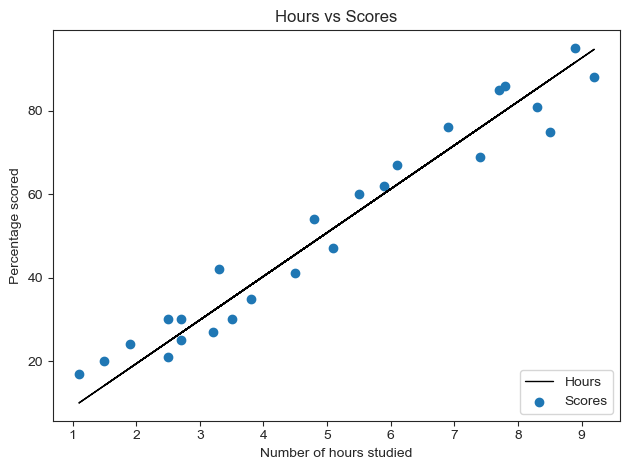

In [44]:
# Regression line => y=m*x+c
regression_line=regressor.coef_*X+regressor.intercept_


# Plotting the regression line
plt.scatter(X, y)
plt.plot(X, regression_line, lw=1, c='black')
plt.title('Hours vs Scores')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage scored')
plt.legend(df.columns, loc="lower right")
plt.tight_layout()
plt.show()

In [18]:
y_pred=regressor.predict(X_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [19]:
predicted_dataframe=pd.DataFrame({"Actual Score": y_test, "Predicted Score":y_pred})
predicted_dataframe.to_csv("Actual vs Predicted Scores.csv")
predicted_dataframe

,Actual Score,Predicted Score
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [33]:
# Prediction
given_hour=9.25
prediction=regressor.predict([[given_hour]])
print("The score that a student will score if he studied for {} is : {}".format(given_hour, prediction[0]))

The score that a student will score if he studied for 9.25 is : 95.22829438402952


In [34]:
# mean squared error
mse=mean_squared_error(y_test, y_pred)
mse

68.88092074277635

In [35]:
# r2 score
r_2_score=r2_score(y_test, y_pred)
r_2_score

0.8421031525243527